In [1]:
import phoebe
import numpy as np
from spice.models.phoebe_model import PhoebeModel
from spice.spectrum import simulate_observed_flux
from transformer_payne import Blackbody

import matplotlib
%matplotlib inline

from phoebe.parameters.dataset import _mesh_columns

# Using PHOEBE models

You can refer to the [PHOEBE](http://phoebe-project.org) documentation to learn how to use this software.

The basic prerequisites are a model which contains a mesh dataset with:
- uvw coordinates
- all the mesh columns

In [11]:
b = phoebe.default_star()

times = np.linspace(0, 1, 10)
COLUMNS = _mesh_columns

b.add_dataset('mesh', compute_times=times, columns=COLUMNS, dataset='mesh01')
b.run_compute(irrad_method='none', coordinates='uvw', overwrite=True)

100%|██████████| 10/10 [00:00<00:00, 98.81it/s]


<ParameterSet: 312 parameters | qualifiers: comments, visible_centroids, nxs, mus, vzs, xyz_elements, ys, nzs, vys, areas, loggs, ws, rprojs, vus, nws, rs, nvs, uvw_normals, vws, us, vxs, uvw_elements, vvs, vs, times, nus, teffs, xyz_normals, visibilities, volume, xs, nys, zs>

To create a SPICE model, create a ```PhoebeConfig``` object first. This will contain the ```PHOEBE``` model and some utility functions. You have to pass in the name of the mesh dataset that will be used.

In [12]:
b.get_parameter('distance')

<Parameter: distance=1.0 m | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>

In [13]:
from spice.models.phoebe_utils import PhoebeConfig
p = PhoebeConfig(b, 'mesh01')

Then, a ```PhoebeModel``` can be constructed for the ```PhoebeConfig``` model and selected timestamp.

```PhoebeConfig``` contains the information about all timesteps, and the ```PhoebeModel``` is created for one timestep only.

In [15]:
bb = Blackbody()
pm = PhoebeModel.construct(p, times[0], bb.parameter_names, component='starA')
pm2 = PhoebeModel.construct(p, times[5], bb.parameter_names, component='starA')

After creating a ```PhoebeModel```, a spectrum can be synthesized the same way as for a regular ```Icosphere``` model.

In [16]:
ws = np.linspace(4000, 10000, 1000)
s = simulate_observed_flux(bb.intensity, pm, np.log10(ws))

(<Figure size 1000x1200 with 2 Axes>,
 <Axes3D: xlabel='$X [R_\\odot]$', ylabel='$Y [R_\\odot]$', zlabel='$Z [R_\\odot]$'>)

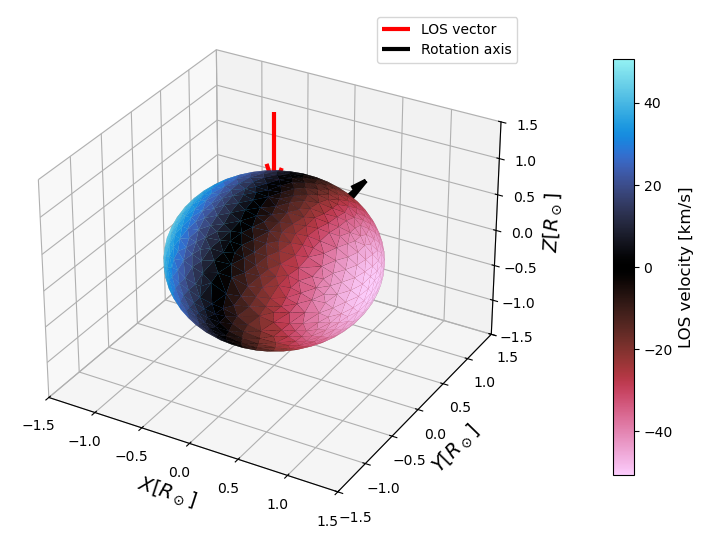

In [19]:
from spice.plots.plot_mesh import plot_3D

plot_3D(pm, property='los_velocities')